<a href="https://colab.research.google.com/github/Keving7898/MODELO-LLM-EXAMEN-FINAL/blob/main/Proyecto_reconocimiento_de_manzanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto de fin de curso:**
*Aplicación de algoritmos de Maching Learning*

In [ ]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras import Sequential, layers

In [ ]:
# Importación de imágenes de manzanas
# se utiliza el servicio de drive desde la librería google.colab
# Se trata de utilizar los contenidos desde el Drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Asociar el directorio de la carpeta en drive para acceder a imágenes

#ruta de la carpeta (path):
path="/content/drive/MyDrive/Manzanas"

# escoger el nombre de las carpetas y utilizar estas imágenes desde ahí
image_train_names=os.path.join(path)

#Visualizar el nombre de las carpetas, posteriormente serían nuestras etiquetas o labels
print(os.listdir(image_train_names))


['Podridas', 'Frescas']


In [ ]:
# Ver número de archivos en las carpetas Podridas y Frescas
# Se utiliza estructura for para realizar conteo y detección iterativa

n=0
# El i puede ser cualquier elemento, como se utiliza listdir, entonces
# i es un string con el nombre de las carpetas, podridas y frescas, desde
# ahí se contabiliza el número de archivos en cada carpeta
for i in os.listdir(image_train_names):
  # ruta --> se agrega un subdcarpeta:  "Podridas" o "Frescas"
  ruta=os.path.join(path+"/"+i)

  # se cuenta el número de elementos que recorre en la ruta
  num=len(os.listdir(ruta))
  print("Número de imágenes con la etiqueta \"{}\" es: {}".format(i,num))
  n=n+num

# Visualizar el total de imágenes
print("Total de imágenes es: ",n)

Número de imágenes con la etiqueta "Podridas" es: 65
Número de imágenes con la etiqueta "Frescas" es: 46
Total de imágenes es:  111


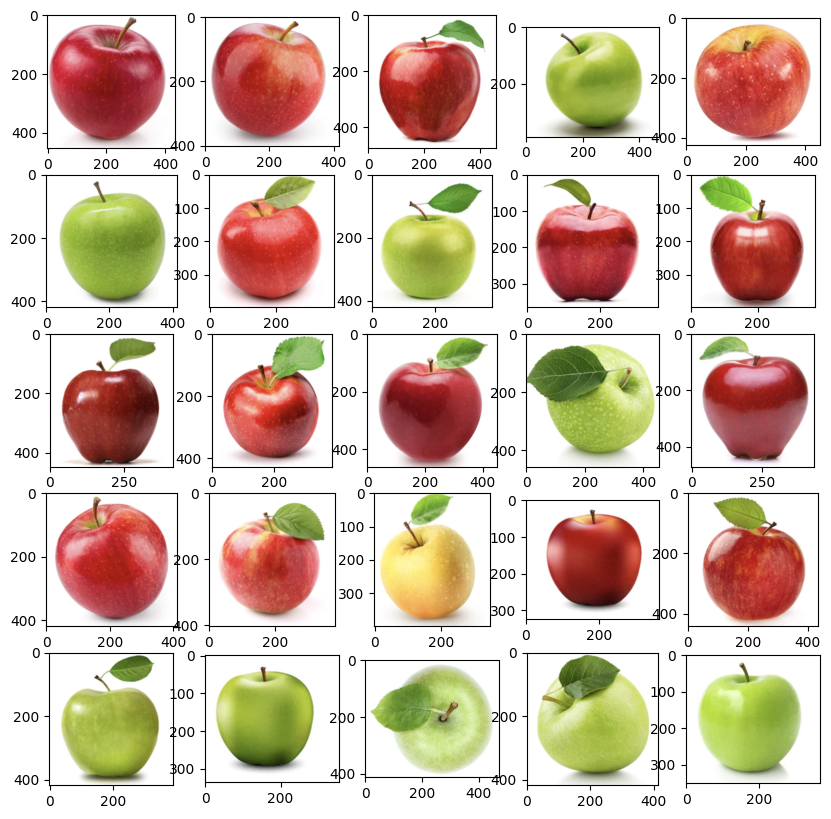

In [ ]:
# Visualizar imágenes de manzanas Frescas
import matplotlib.image as mpimg
# figsize contiene el tamaño de la imagen pero pulgadas
# se requiere de dip que es cantidad de pixels por pulgadas

# sería entonces size (w*dpi, h*dpi)
# w,h son ancho y altura
# por default dpi es 100
plt.figure(figsize=(10,10))

ruta1='/content/drive/MyDrive/Manzanas/Frescas'
img1=os.listdir(ruta1)

for i, nombimg in enumerate (img1[:25]):
  plt.subplot(5,5,i+1)
  man_frescas=mpimg.imread(ruta1+'/'+nombimg)
  plt.imshow(man_frescas)

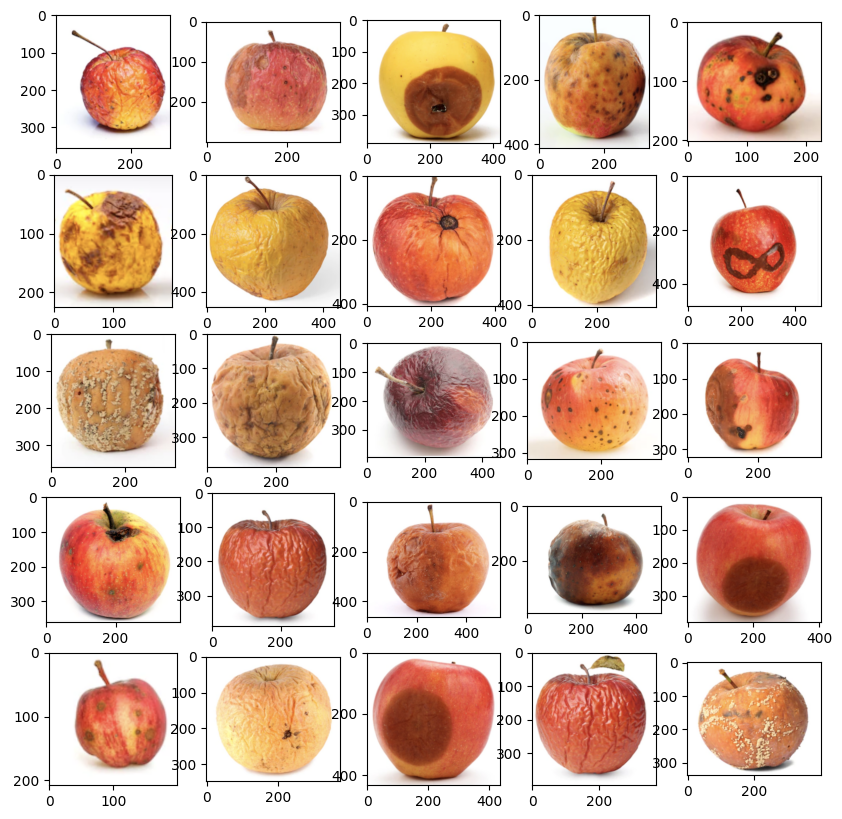

In [ ]:
# Visualizar imágenes de manzanas Podridas
plt.figure(figsize=(10,10))

ruta2='/content/drive/MyDrive/Manzanas/Podridas'
img2=os.listdir(ruta2)

for i, nombimg in enumerate (img2[:25]):
  plt.subplot(5,5,i+1)
  man_podridas=mpimg.imread(ruta2+'/'+nombimg)
  plt.imshow(man_podridas)

In [ ]:
# Crear carpetas de datasets y tener unas misma cantidad de imágenes
!mkdir dataset_manzanas
!mkdir dataset_manzanas/Podridas
!mkdir dataset_manzanas/Frescas

In [ ]:
# Copiar las imágenes y colocarlas a estas carpetas
# límite de 46 imágenes, el menor número .
# Depués se enriquecerá con el generador de imágenes

# Carpeta Podridas
import shutil
carpeta_fuente='/content/drive/MyDrive/Manzanas/Podridas'
carpeta_destino='/content/dataset_manzanas/Podridas'
man_podridas=os.listdir(carpeta_fuente)

for i,nombreimg in enumerate(man_podridas):
  if i<46:
    #copiar a carpeta destino
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpeta_destino+'/'+nombreimg)

In [ ]:
# Carpeta Frescas
carpeta_fuente='/content/drive/MyDrive/Manzanas/Frescas'
carpeta_destino='/content/dataset_manzanas/Frescas'
man_frescas=os.listdir(carpeta_fuente)

for i,nombreimg in enumerate(man_frescas):
  if i<46:
    #copiar a carpeta destino
    shutil.copy(carpeta_fuente+'/'+nombreimg, carpeta_destino+'/'+nombreimg)

In [ ]:
# Visualizar número de imágenes
path_n='/content/dataset_manzanas'
image_train_names=os.path.join(path_n)

ns=0
for i in os.listdir(image_train_names):
  # ruta --> se agrega un subdcarpeta:  "Podridas" o "Frescas"
  ruta=os.path.join(path_n+"/"+i)

  # se cuenta el número de elementos que recorre en la ruta
  num=len(os.listdir(ruta))
  print("Número de imágenes con la etiqueta \"{}\" es: {}".format(i,num))
  ns=ns+num

# Visualizar el total de imágenes
print("Total de imágenes es: ",ns)

Número de imágenes con la etiqueta "Podridas" es: 46
Número de imágenes con la etiqueta "Frescas" es: 46
Total de imágenes es:  92


In [ ]:
# Enriquecer con generador de imagenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
       rescale=1./255,
       rotation_range=30,
       width_shift_range=0.25,
       height_shift_range=0.25,
       validation_split=0.2 # solo para pruebas

)

data_gen_train =datagen.flow_from_directory(
        path_n,
        target_size=(250,250),
        batch_size=16,
        subset='training',
        class_mode="binary"
)

data_gen_test =datagen.flow_from_directory(
        path_n,
        target_size=(250,250),
        batch_size=16,
        subset='validation',
        class_mode="binary"

)

Found 74 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
# Empezamos a desarrollar nuestra red convolucional
# comenzamos siempre con un CONV2 y después el Maxpooling2D

# Para Conv2D se escribe en este formato:
# layer.Conv2D(a,s,fa,in)
# a: es el número de kernels (coincidencia de patrones, tambien filtros)
# s: es el tamaño de cada kernel
# fa: activation="fa" , cualquiera/ como red oculta relu
# int: input_shape (ancho,altura, número de canales) , canales: modelo RGB son 3 canales

# Maxpooling ( agrupamiento --> tamaño como argumento)
#layer.MaxPooling2D(argumento)

# Nota: si aumentas el número de kernels, obtienes mejor muestreo y con ello mayor detalles.
# Nota 1: dropout me permite mejorar el rendimiento de la red, todas las neuronas trabajan
# Nota 2: flaten, para generar vector apartir de matriz

modelo=Sequential([  layers.Conv2D(16,(3,3), activation="relu",input_shape=(250,250,3)),
                     layers.MaxPooling2D(2,2),
                     layers.Conv2D(32,(3,3), activation="relu"),
                     layers.MaxPooling2D(2,2),
                     layers.Conv2D(64,(3,3), activation="relu"),
                     layers.MaxPooling2D(2,2),
                     layers.Conv2D(64,(3,3), activation="relu"),
                     layers.MaxPooling2D(2,2),
                     layers.Conv2D(64,(3,3), activation="relu"),
                     layers.MaxPooling2D(2,2),

                     layers.Dropout(0.5),
                     layers.Flatten(),
                     layers.Dense(512,activation="relu"),
                     layers.Dense(1,activation="sigmoid")

                  ])

In [ ]:
from tensorflow.keras.optimizers import Adam
modelo.compile(optimizer=Adam(0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

In [ ]:
# Batch: Número de lotes, es decir cada conjunto de muestras que se utiliza por actualización
# Epocas: Número de iteraciones

batch=len(data_gen_train) # batch = 5
epch=32

hist=modelo.fit(
       data_gen_train,
       batch_size=batch,
       epochs=epch,
       validation_data=data_gen_test
)





Epoch 1/32
5/5 [==============================] - 7s 1s/step - loss: 0.7105 - accuracy: 0.4865 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 3/32
5/5 [==============================] - 6s 1s/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/32
5/5 [==============================] - 8s 2s/step - loss: 0.6955 - accuracy: 0.4189 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/32
5/5 [==============================] - 7s 1s/step - loss: 0.6940 - accuracy: 0.4730 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/32
5/5 [==============================] - 8s 2s/step - loss: 0.6921 - accuracy: 0.5270 - val_loss: 0.6898 - val_accuracy: 0.7222
Epoch 7/32
5/5 [==============================] - 6s 1s/step - loss: 0.6915 - accuracy: 0.6081 - val_loss: 0.6914 - val_accuracy: 0.3889
Epoch 8/32
5/5 [==============================] - 7s 1s/step - loss: 0.6976 - accuracy: 0.4730 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 9/32
5/5 [=========================

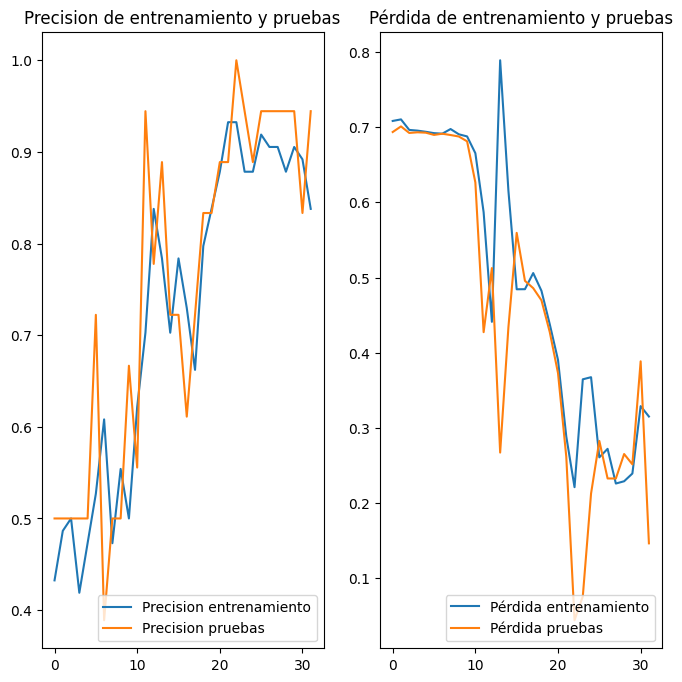

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

rango_epocas=range(epch)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1) # gráfica 1 Precision
plt.plot(rango_epocas,acc,label='Precision entrenamiento') # curva 1
plt.plot(rango_epocas,val_acc,label='Precision pruebas') # curva 2
plt.legend(loc='lower right')
plt.title('Precision de entrenamiento y pruebas')


plt.subplot(1,2,2) # gráfica 2 Perdida
plt.plot(rango_epocas,loss,label='Pérdida entrenamiento') # curva 1
plt.plot(rango_epocas,val_loss,label='Pérdida pruebas') # curva 2
plt.legend(loc='lower right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
# probar nuestro modelo con imágenes sacas de internet (Enlace)
from PIL import Image
import requests
from io import BytesIO
import cv2

# elaborar una función
def modelo_prediccion(url):
  descarga=requests.get(url)
  manzana=Image.open(BytesIO(descarga.content))
  manzana=np.array(manzana).astype(float)/255

  manzana=cv2.resize(manzana,(250,250))
  prediccion=modelo.predict(manzana.reshape(-1,250,250,3))

  if prediccion[0]>0.5:
     respuesta='Manzana Podrida'
  else:
     respuesta='Manzana Fresca'
  return respuesta


In [ ]:
# Ponerlo a prueba
url='https://static3.depositphotos.com/1001025/239/i/950/depositphotos_2395678-stock-photo-rotten-apple.jpg'
resultado=modelo_prediccion(url)
print(resultado)

1/1 [==============================] - 0s 152ms/step
Manzana Podrida


In [ ]:
#Guardar mi modelo entrenado
!mkdir drive/MyDrive/clasificador_manzanas

In [ ]:
path_json="/content/drive/MyDrive/clasificador_manzanas.json"
path_h5="/content/drive/MyDrive/clasificador_manzanas.h5"

# guardar en disco
with open(path_json,"w") as json_file:
  modelo_json=modelo.to_json()
  json_file.write(modelo_json)
json_file.close()

modelo.save_weights(path_h5)
print("Modelo Guardado!!!!")

Modelo Guardado!!!!
